## Classification of Iris data

### Import packages and data

In [1]:
#Import packages
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn

In [2]:
#Import data into program
data = pd.read_excel('ASDRP Data Collection.xlsx')
data.shape

(197, 18)

In [3]:
data.columns

Index(['Encoded States', 'Crime Rate', 'Median Household Income',
       'Population Density (ppl  square mile)',
       'Education Rate (% College Degree)', 'Homelessness Rate (with average)',
       'Age', 'White', 'Black', 'Asian', 'Hispanic', 'Percent of Democrats',
       'Percent of Republicans', 'Employment Rate', 'Disabilities', 'Religion',
       'Police Count Per 10k (with average)', 'Stress Score (with average)'],
      dtype='object')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#List first 5 rows
data.head()

,Encoded States,Crime Rate,Median Household Income,Population Density (ppl square mile),Education Rate (% College Degree),Homelessness Rate (with average),Age,White,Black,Asian,Hispanic,Percent of Democrats,Percent of Republicans,Employment Rate,Disabilities,Religion,Police Count Per 10k (with average),Stress Score (with average)
0,1,H,37375,1411.3,0.274,0.0165,35.9,0.266,0.683,0.012,0.041,0.558,0.426,0.4480,0.144,0.841,39.5,54.85
1,1,M,55305,970.0,0.441,0.0023,36.9,0.597,0.318,0.026,0.063,0.448,0.528,0.4822,0.093,0.547,21.2,41.22
2,1,M,50124,1234.7,0.328,0.0017,35.7,0.315,0.608,0.032,0.038,0.651,0.336,0.4406,0.124,0.702,21.2,51.12
3,1,M,42321,1329.8,0.294,0.0027,37.7,0.436,0.511,0.018,0.027,0.434,0.553,0.4356,0.090,0.619,19.8,52.94
4,1,M,88390,11.8,0.384,0.0065,38.1,0.664,0.009,0.068,0.069,0.534,0.421,0.5316,0.081,0.290,15.2,37.34


### Exploratory Data Analysis (EDA)

In [6]:
#Statistics
data.describe()

,Encoded States,Median Household Income,Population Density (ppl square mile),Education Rate (% College Degree),Homelessness Rate (with average),Age,White,Black,Asian,Hispanic,Percent of Democrats,Percent of Republicans,Employment Rate,Disabilities,Religion,Police Count Per 10k (with average),Stress Score (with average)
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,23.274112,58566.411168,4147.637056,0.340920,0.006516,35.039086,0.609193,0.191853,0.068640,0.192706,0.575198,0.513513,0.498854,0.091533,0.495249,20.389340,43.551015
std,15.078231,19154.994143,3696.390150,0.126891,0.007782,3.509861,0.178430,0.174222,0.088268,0.184542,0.122439,1.550407,0.051293,0.028203,0.117504,7.594516,5.867888
min,1.000000,30894.000000,11.800000,0.108000,0.000100,23.600000,0.144000,0.005000,0.003000,0.010000,0.242000,0.107000,0.389800,0.033000,0.253000,7.500000,27.250000
25%,9.000000,45527.000000,2043.400000,0.257000,0.002500,33.000000,0.472000,0.051000,0.025000,0.067000,0.501000,0.331000,0.463500,0.071000,0.405000,14.700000,40.650000
50%,22.000000,53833.000000,3176.600000,0.324000,0.004700,35.000000,0.616000,0.138000,0.040000,0.108000,0.562000,0.417000,0.496600,0.091000,0.483000,19.400000,43.550000
75%,36.000000,65745.000000,4730.000000,0.399000,0.006600,36.800000,0.756000,0.290000,0.069000,0.276000,0.651000,0.475000,0.531800,0.110000,0.573000,24.300000,46.320000
max,50.000000,133354.000000,27222.300000,0.790000,0.061400,50.100000,0.942000,0.825000,0.610000,0.957000,0.873000,22.100000,0.633000,0.165000,0.957000,43.900000,61.550000


In [7]:
data.columns

Index(['Encoded States', 'Crime Rate', 'Median Household Income',
       'Population Density (ppl  square mile)',
       'Education Rate (% College Degree)', 'Homelessness Rate (with average)',
       'Age', 'White', 'Black', 'Asian', 'Hispanic', 'Percent of Democrats',
       'Percent of Republicans', 'Employment Rate', 'Disabilities', 'Religion',
       'Police Count Per 10k (with average)', 'Stress Score (with average)'],
      dtype='object')

In [8]:
#Counts of dependent variable
data['Crime Rate'].value_counts()


M    91
L    76
H    30
Name: Crime Rate, dtype: int64

In [9]:
#plot box plots for independent variables
data.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

ValueError: Layout of 2x2 must be larger than required size 17

<Figure size 432x288 with 0 Axes>

In [ ]:
#Histograms for each independent variable
data.hist()
pyplot.show()

In [ ]:
#Multi-variate plots
scatter_matrix(data)
pyplot.show()

### Split into train and test datasets

In [10]:
#Separate out dependent variable
y = data.pop('Crime Rate')

In [11]:
y

0      H
1      M
2      M
3      M
4      M
      ..
192    M
193    L
194    L
195    L
196    L
Name: Crime Rate, Length: 197, dtype: object

In [12]:
y.unique()

array(['H', 'M', 'L'], dtype=object)

In [13]:
#Separate out indepedent variables
x = data.copy()

In [14]:
x

,Encoded States,Median Household Income,Population Density (ppl square mile),Education Rate (% College Degree),Homelessness Rate (with average),Age,White,Black,Asian,Hispanic,Percent of Democrats,Percent of Republicans,Employment Rate,Disabilities,Religion,Police Count Per 10k (with average),Stress Score (with average)
0,1,37375,1411.3,0.274,0.0165,35.9,0.266,0.683,0.012,0.041,0.558,0.426,0.4480,0.144,0.841,39.5,54.85
1,1,55305,970.0,0.441,0.0023,36.9,0.597,0.318,0.026,0.063,0.448,0.528,0.4822,0.093,0.547,21.2,41.22
2,1,50124,1234.7,0.328,0.0017,35.7,0.315,0.608,0.032,0.038,0.651,0.336,0.4406,0.124,0.702,21.2,51.12
3,1,42321,1329.8,0.294,0.0027,37.7,0.436,0.511,0.018,0.027,0.434,0.553,0.4356,0.090,0.619,19.8,52.94
4,1,88390,11.8,0.384,0.0065,38.1,0.664,0.009,0.068,0.069,0.534,0.421,0.5316,0.081,0.290,15.2,37.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,49,49251,2282.9,0.273,0.0029,34.5,0.749,0.043,0.042,0.164,0.455,0.527,0.5187,0.104,0.680,17.9,43.55
193,49,55417,3574.1,0.246,0.0070,35.8,0.766,0.107,0.021,0.179,0.475,0.507,0.4903,0.102,0.377,19.9,43.55
194,50,64598,2036.2,0.579,0.0063,36.6,0.873,0.017,0.015,0.159,0.338,0.620,0.4907,0.101,0.410,15.9,44.07
195,50,61979,2231.1,0.248,0.0004,35.9,0.942,0.013,0.003,0.083,0.242,0.718,0.5227,0.100,0.378,15.2,41.41


In [15]:
#Split into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((157, 17), (40, 17), (157,), (40,))

In [16]:
x_train

,Encoded States,Median Household Income,Population Density (ppl square mile),Education Rate (% College Degree),Homelessness Rate (with average),Age,White,Black,Asian,Hispanic,Percent of Democrats,Percent of Republicans,Employment Rate,Disabilities,Religion,Police Count Per 10k (with average),Stress Score (with average)
31,4,108297,7960.8,0.440,0.0096,36.9,0.344,0.227,0.158,0.270,0.798,0.176,0.5337,0.072,0.345,18.9,42.14
126,31,63849,11205.3,0.381,0.0065,39.0,0.472,0.194,0.063,0.397,0.676,0.313,0.4804,0.077,0.649,30.3,37.90
161,40,52351,1489.6,0.228,0.0047,38.0,0.789,0.015,0.016,0.059,0.358,0.610,0.4733,0.101,0.425,15.3,34.34
93,21,49619,3860.4,0.185,0.0065,39.4,0.662,0.198,0.098,0.028,0.453,0.534,0.4595,0.120,0.432,14.5,43.55
109,26,60092,3410.9,0.522,0.0136,34.6,0.755,0.121,0.040,0.141,0.544,0.431,0.5199,0.077,0.544,18.3,35.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,24,51276,1909.1,0.352,0.0024,28.5,0.760,0.111,0.061,0.034,0.548,0.423,0.5299,0.080,0.405,13.2,43.55
176,44,48888,2797.8,0.303,0.0021,23.6,0.856,0.011,0.028,0.177,0.263,0.667,0.5455,0.065,0.957,8.9,43.55
160,40,59912,2479.6,0.438,0.0023,34.4,0.837,0.067,0.025,0.055,0.438,0.533,0.5543,0.073,0.418,13.6,33.17
12,3,41724,1396.7,0.218,0.0009,36.5,0.628,0.088,0.061,0.196,0.307,0.662,0.4460,0.155,0.697,18.3,49.63


In [17]:
x_test

,Encoded States,Median Household Income,Population Density (ppl square mile),Education Rate (% College Degree),Homelessness Rate (with average),Age,White,Black,Asian,Hispanic,Percent of Democrats,Percent of Republicans,Employment Rate,Disabilities,Religion,Police Count Per 10k (with average),Stress Score (with average)
129,32,62817,3011.6,0.335,0.0037,34.2,0.467,0.355,0.066,0.146,0.667,0.316,0.5521,0.056,0.541,19.4,39.99
67,14,58511,1879.6,0.321,0.0048,36.3,0.831,0.081,0.030,0.041,0.556,0.419,0.5332,0.067,0.537,16.3,36.11
38,6,42401,3713.0,0.157,0.0412,34.8,0.596,0.216,0.017,0.366,0.580,0.406,0.4328,0.114,0.492,25.1,43.55
142,35,47650,2043.4,0.183,0.0109,35.5,0.633,0.150,0.035,0.171,0.409,0.565,0.4811,0.109,0.339,18.4,49.83
44,8,53833,3570.6,0.386,0.0037,36.0,0.616,0.233,0.045,0.262,0.527,0.458,0.4950,0.082,0.407,25.3,43.29
58,12,71749,4297.7,0.312,0.0030,33.9,0.564,0.105,0.093,0.427,0.561,0.417,0.5122,0.058,0.720,18.3,38.65
45,8,35068,10589.4,0.157,0.0065,44.5,0.783,0.018,0.006,0.957,0.533,0.460,0.4712,0.071,0.406,10.9,53.17
84,19,85636,5445.3,0.472,0.0065,37.3,0.612,0.210,0.021,0.201,0.558,0.413,0.5403,0.079,0.389,27.5,43.55
182,46,47250,3906.4,0.360,0.0037,34.0,0.452,0.461,0.021,0.071,0.829,0.149,0.5146,0.113,0.521,30.6,50.17
119,29,48407,10639.7,0.153,0.0065,34.5,0.371,0.200,0.018,0.637,0.670,0.315,0.4860,0.076,0.670,22.7,43.55


In [18]:
y_train

31     H
126    L
161    M
93     M
109    M
      ..
106    M
176    L
160    M
12     M
114    M
Name: Crime Rate, Length: 157, dtype: object

In [19]:
y_test

129    M
67     L
38     M
142    M
44     M
58     L
45     L
84     M
182    L
119    M
24     M
35     L
98     L
139    H
100    M
136    M
130    L
92     M
65     M
113    M
179    L
152    L
43     M
163    H
156    L
167    H
128    M
124    H
131    M
166    L
158    M
66     M
105    H
48     H
172    L
170    L
70     L
68     M
151    M
36     M
Name: Crime Rate, dtype: object

### Build Model

In [20]:
#Instantiate and fit model
model = RandomForestClassifier()
#model = XGBClassifier(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier()

### Predict for all test dataset

In [21]:
#Predict for test set
predictions = model.predict(x_test)

In [22]:
predictions

array(['M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'H', 'M', 'L', 'L', 'L',
       'M', 'M', 'M', 'M', 'M', 'M', 'L', 'L', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'L', 'M', 'M',
       'M'], dtype=object)

In [23]:
#Check accuracy of predictions
accuracy_score(y_test, predictions)
#RMSE - root mean square error


0.575

c:\users\aamod\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


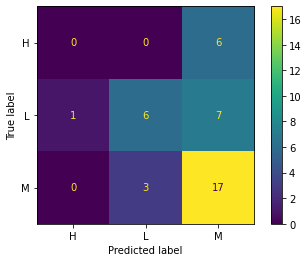

In [24]:
#Plot confusion matrix
sklearn.metrics.plot_confusion_matrix(model, x_test, y_test)

### Predict for a new City

In [35]:
#Dimensions of a new City
Encoded States = 50
Median Household Income = $46,117
Population Density (ppl  square mile) = 1800.4
Education Rate (% College Degree) = 24.40%
Homelessness Rate (with average) = 0.38%
Age = 25.9
White = 87.30%
Black = 1.40%
Asian = 3.80%
Hispanic = 10.80%
Percent of Democrats = 48.80%
Percent of Republicans = 46.10%
Employment Rate = 56.38%
Disabilities = 7.10%
Religion = 37.40%
Police Count Per 10k (with average) = 14.2
Stress Score (with average) = 43.55

SyntaxError: invalid syntax (3382232795.py, line 2)

In [36]:
#Predict the species
inputs = np.array([Encoded States, Median Household Income, Population Density (ppl  square mile), Education Rate (% College Degree), Homelessness Rate (with average), Age, White, Black, Asian, Hispanic, Percent of Democrats, Percent of Republicans, Employment Rate, Disabilities, Religion, Police Count Per 10k (with average), Stress Score (with average)]).reshape(1,-1)
print('Predicted Crime Rate is: ' + model.predict(inputs)[0])

SyntaxError: invalid syntax (1277746771.py, line 2)

In [ ]:
#Print the probabilities
print('Probability it is Iris-setosa: ' + str(model.predict_proba(inputs)[0][0]))
print('Probability it is Iris-versicolor: ' + str(model.predict_proba(inputs)[0][1]))
print('Probability it is Iris-virginica: ' + str(model.predict_proba(inputs)[0][2]))

### Feature Importance

In [ ]:
#Use the feature importance to find the most independent variables
feature_importance = pd.DataFrame({'Feature' : x_train.columns, 'Importance' : model.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)

In [ ]:
feature_importance